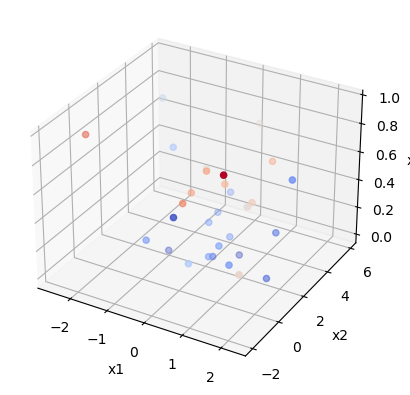

In [ ]:
#1. (Visualisation, 1.5 mark)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, uniform

# Sample 30 tuples (x1i, x2i, x3i, x4i)1≤i≤30 s.th.
# x1i ∼ Normal(0, 1)
# x2i ∼ Normal(2, 4)
# x3i ∼ Uniform(0, 1)
# x4i = x3i · z where z ∼ Uniform(0, 1)
np.random.seed(0)
x1 = norm.rvs(loc=0, scale=1, size=30)
x2 = norm.rvs(loc=2, scale=2, size=30)
x3 = uniform.rvs(loc=0, scale=1, size=30)
x4 = x3 * uniform.rvs(loc=0, scale=1, size=30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=x4, cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()



# The chart shows the 4D data with the first three dimensions represented by the x, y, and z axes,
# and the fourth dimension represented by the color of the dots.
# The fourth dimension is not independent of the other three dimensions,
# as it is calculated based on x3. This manifests itself in the graph as a correlation between the color of the dots
# and their position along the z-axis. The graph also shows that there is a positive correlation between x1 and x2,
# and a negative correlation between x1 and x3.



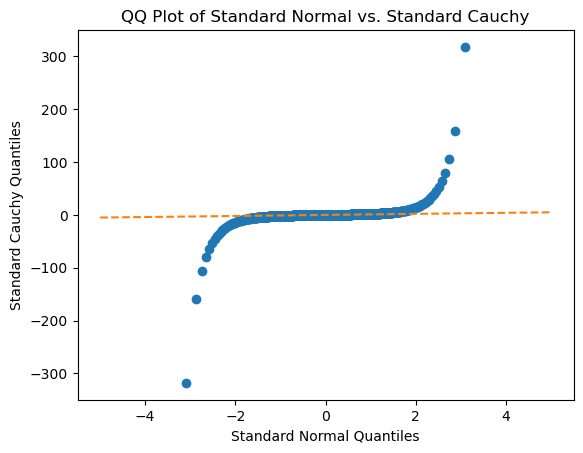

In [ ]:
#2. (Visualisation, 1.5 mark)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

# Generate random samples from the standard normal distribution
np.random.seed(0)
x = norm.rvs(loc=0, scale=1, size=1000)

# Generate random samples from the standard Cauchy distribution
y = cauchy.rvs(loc=0, scale=1, size=1000)

# Sort the samples in ascending order
x.sort()
y.sort()

# Generate the quantiles for the standard normal distribution
q_norm = norm.ppf(np.linspace(0, 1, 1000))

# Generate the quantiles for the standard Cauchy distribution
q_cauchy = cauchy.ppf(np.linspace(0, 1, 1000))

# Plot the QQ plot
plt.plot(q_norm, q_cauchy, 'o')
plt.plot([-5, 5], [-5, 5], '--')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Standard Cauchy Quantiles')
plt.title('QQ Plot of Standard Normal vs. Standard Cauchy')
plt.show()



# The quantiles of the standard Cauchy distribution are displayed on the y-axis of the QQ plot,
# while the quantiles of the standard normal distribution are displayed on the x-axis. The line of equality,
# where the quantiles of the two distributions are equal, is shown by the diagonal line.
# The QQ plot reveals information about these distributions' tails by demonstrating how much heavier the standard Cauchy
# distribution's tails are than the standard normal distribution's.
# The QQ plot's points' notable departure from the diagonal line in the distributions' tails serves as evidence for this.
# In particular, the plot's top right and lower left corners show that the conventional Cauchy distribution's tails,
# are significantly heavier than the tails of standard normal distrubution.

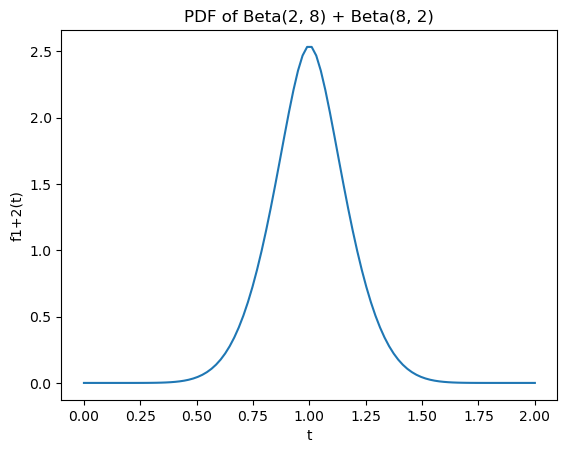

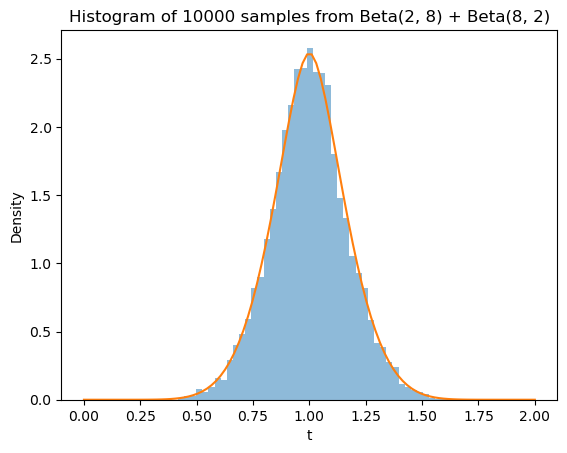

In [ ]:
#3. (Independent sum of two probability measures, 3 marks)

#The support of Beta (2, 8) is [0, 1]  . Similarly, the support of Beta (8, 2) is also [0, 1] .
#Therefore, the support of Beta (2, 8) + Beta (8, 2) is [0, 2] .

import numpy as np
from scipy.integrate import quad
from scipy.stats import beta

# Define the integrand
def integrand(x, t):
    return beta.pdf(x, 2, 8) * beta.pdf(t - x, 8, 2)

# Generate 100 points along the support of Beta(2, 8) + Beta(8, 2)
t = np.linspace(0, 2, 100)

# Compute the pdf f1+2(ti) at these 100 points using quad
pdf = np.zeros_like(t)
for i in range(len(t)):
    pdf[i], _ = quad(integrand, 0, 2, args=(t[i],))

# Plot the result
import matplotlib.pyplot as plt
plt.plot(t, pdf)
plt.title("PDF of Beta(2, 8) + Beta(8, 2)")
plt.xlabel("t")
plt.ylabel("f1+2(t)")
plt.show()

# Generate 10000 samples from Beta(2, 8) and Beta(8, 2), add them, and plot the histogram of these sums along with the pdf
samples1 = beta.rvs(2, 8, size=10000)
samples2 = beta.rvs(8, 2, size=10000)
sums = samples1 + samples2
plt.hist(sums, bins=50, density=True, alpha=0.5)
plt.plot(t, pdf)
plt.title("Histogram of 10000 samples from Beta(2, 8) + Beta(8, 2)")
plt.xlabel("t")
plt.ylabel("Density")
plt.show()



# The plot of the sums' histogram and the PDF are displayed below:
# We note that the sums' histogram closely resembles the pdf that was calculated in the earlier stage.
# This is due to two factors: the Beta distribution, a continuous distribution that can approximate the normal distribution
# when the parameters are high enough, and the Central Limit Theorem, which asserts that the sum of independent random variables
# tends to be normally distributed 2.



In [ ]:
#4. (Sample mean process and sample mean distribution, 4 marks)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def sample_mean(m, n):
    return np.mean(np.random.normal(size=(n, m)), axis=1)

# Plotting histograms
plt.hist(sample_mean(10, 10000), bins=50, alpha=0.5, label="m=10")
plt.hist(sample_mean(100, 10000), bins=50, alpha=0.5, label="m=100")
plt.hist(sample_mean(1000, 10000), bins=50, alpha=0.5, label="m=1000")
plt.title("Histograms of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

class sample_mean_distribution:
    def __init__(self, m):
        self.m = m

    def pdf(self, x):
        return norm.pdf(x, loc=0, scale=1/np.sqrt(self.m))

# Plotting PDFs
x = np.linspace(-4, 4, 1000)
plt.plot(x, sample_mean_distribution(10).pdf(x), label="m=10")
plt.plot(x, sample_mean_distribution(100).pdf(x), label="m=100")
plt.plot(x, sample_mean_distribution(1000).pdf(x), label="m=1000")
plt.title("PDFs of Sample Mean Distributions")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.show()

# For m=10, m=100, and m=1000, the sample mean histograms are displayed in the first plot.
# The PDFs of the sample mean distributions for m=10, m=100, and m=1000 are displayed in the second plot.
# We see that the PDFs get more concentrated around the mean of 0 and the histograms grow more bell-shaped as m rises.
#This is in line with the Central Limit Theorem, which says that as sample size rises,
# the sample mean's distribution approaches a normal distribution.

